In [24]:
import numpy as np
import pandas as pd 
from sklearn.decomposition import PCA
pca= PCA()
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [25]:
#dimentionality reduction

#cleaning the data
meltwater = pd.read_csv("NestMetric Training Data.csv")
meltwater.head()

,Anonymous Company id,Geo,"Account Churned? (1=Yes, 0=No)",Year of Change,Month of Change,nbr of days since last account operation,nbr of days since last document operation,docs opened on mobile,docs opened in reports,docs opened on web,docs opened any source,docs tagged on mobile,docs tagged on web,docs shared any source,docs chg sentiment any source,docs hidden any source,mobile logins,web logins,mobile foreground,forgot password
0,1,Geo 1,1,2017,2,35.0,NaN,0,0,0,0,0,0,0,0,0,0,35,0,0
1,2,Geo 2,0,2017,7,NaN,11.0,0,11,0,11,0,0,0,0,0,0,0,0,0
2,3,Geo 1,0,2017,7,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Geo 2,0,2017,5,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Geo 2,0,2017,8,NaN,50.0,0,50,0,50,0,0,0,0,0,0,0,0,0


In [26]:
meltwater = meltwater.drop(["Anonymous Company id","Geo","Month of Change", "Year of Change", "forgot password"], axis= 1)



In [27]:
meltwater = meltwater.dropna()
meltwater = meltwater.reset_index(drop=True)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
meltwater[["nbr of days since last account operation",
           "nbr of days since last document operation",
           "docs opened on mobile",
           "docs opened in reports",
           "docs opened on web",
           "docs opened any source",
           "docs tagged on mobile",
           "docs tagged on web",
           "docs shared any source",
           "docs chg sentiment any source",
           "docs hidden any source",
           "mobile logins",
           "web logins",
           "mobile foreground"]] = scaler.fit_transform(meltwater[["nbr of days since last account operation",
           "nbr of days since last document operation",
           "docs opened on mobile",
           "docs opened in reports",
           "docs opened on web",
           "docs opened any source",
           "docs tagged on mobile",
           "docs tagged on web",
           "docs shared any source",
           "docs chg sentiment any source",
           "docs hidden any source",
           "mobile logins",
           "web logins",
           "mobile foreground"]])




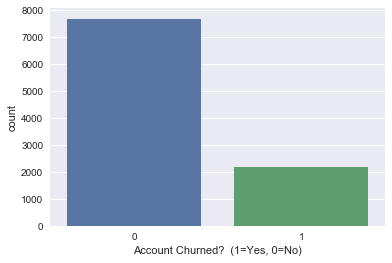

In [29]:
sns.set(style="darkgrid")
import seaborn as sns
ax = sns.countplot(x="Account Churned?  (1=Yes, 0=No)", data=meltwater)

In [30]:
no_churn = len(meltwater[meltwater["Account Churned?  (1=Yes, 0=No)"] == 1])
non_churn_indices = meltwater[meltwater["Account Churned?  (1=Yes, 0=No)"] == 0].index

random_indices = np.random.choice(non_churn_indices,no_churn,replace =False)
churn_indices = meltwater[meltwater["Account Churned?  (1=Yes, 0=No)"] == 1].index

under_sample_indices = np.concatenate([churn_indices,random_indices])
under_sample = meltwater.loc[under_sample_indices]

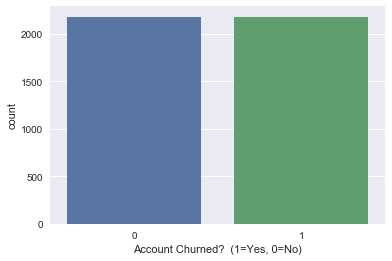

In [31]:
sns.countplot(x='Account Churned?  (1=Yes, 0=No)', data=under_sample)



In [73]:
array = under_sample.values
X = array[:,1:16]
Y = array[:,0]
Y[4]




1.0

In [74]:
#split the data
#train, test = train_test_split(meltwater, test_size=0.2)

 # Call the diabetes dataset from sklearn
df = pd.DataFrame(under_sample, columns=["nbr of days since last account operation",
           "nbr of days since last document operation",
           "docs opened on mobile",
           "docs opened in reports",
           "docs opened on web",
           "docs opened any source",
           "docs tagged on mobile",
           "docs tagged on web",
           "docs shared any source",
           "docs chg sentiment any source",
           "docs hidden any source",
           "mobile logins",
           "web logins",
           "mobile foreground"]) # load the dataset as a pandas data frame
# define the target variable (dependent variable) as y
y =pd.DataFrame(under_sample["Account Churned?  (1=Yes, 0=No)"])







In [75]:
X

array([[0.01126972, 0.00014578, 0.0023015 , ..., 0.02586207, 0.01025641,
        0.0081043 ],
       [0.01784373, 0.        , 0.00057537, ..., 0.00862069, 0.05714286,
        0.00317125],
       [0.00225394, 0.00018743, 0.        , ..., 0.        , 0.00732601,
        0.        ],
       ...,
       [0.00112697, 0.00058312, 0.        , ..., 0.        , 0.0029304 ,
        0.00035236],
       [0.00244177, 0.00223529, 0.        , ..., 0.        , 0.00952381,
        0.        ],
       [0.00093914, 0.00188819, 0.        , ..., 0.        , 0.0007326 ,
        0.        ]])

In [76]:
y =pd.DataFrame(under_sample["Account Churned?  (1=Yes, 0=No)"])



In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)
print( X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)



(3492, 14) (3492,)
(874, 14) (874,)


In [78]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()

In [79]:
model.fit (X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [80]:
importances = model.feature_importances_
print(importance)

[0.22338131 0.13653141 0.04638185 0.13191992 0.12455501 0.12740016
 0.01511232 0.04916407 0.05288577 0.03873543 0.02534574 0.028587  ]


 importance score for each attribute where the larger score the more important the attribute

Text(0.5,0,'Relative Importance')

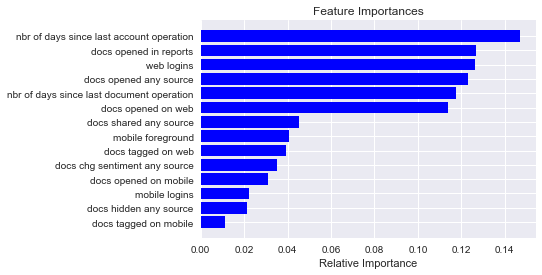

In [81]:
indices = np.argsort(importances)

# get the features from the original data set
features = under_sample.columns[1:30]

# plot them with a horizontal bar chart
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

The above diagram ranks all the features used and their imortance to churn 

In [64]:
under_sample.head()

,"Account Churned? (1=Yes, 0=No)",nbr of days since last account operation,nbr of days since last document operation,docs opened on mobile,docs opened in reports,docs opened on web,docs opened any source,docs tagged on mobile,docs tagged on web,docs shared any source,docs chg sentiment any source,docs hidden any source,mobile logins,web logins,mobile foreground
7,1,0.011270,0.000146,0.002301,0.000021,0.001463,0.000137,0.000704,0.0,0.000136,0.0,0.0,0.025862,0.010256,0.008104
19,1,0.017844,0.000000,0.000575,0.000000,0.000000,0.000007,0.000000,0.0,0.000000,0.0,0.0,0.008621,0.057143,0.003171
23,1,0.002254,0.000187,0.000000,0.000007,0.003291,0.000192,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.007326,0.000000
27,1,0.000751,0.001069,0.000000,0.001032,0.000610,0.001065,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000733,0.000000
28,1,0.001315,0.000847,0.000000,0.000674,0.003048,0.000845,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.003663,0.000000
